# XML

1.   **eXtensible** Markup Language - What is the meaning of extensible?
2.   Carries the data, does not present it. 
3. public and open





## An Example

```
<bookstore>
   <book category="cooking">
       <title lang="en">Everyday Italian</title>
       <author>Giada De Laurentiis</author>
       <year>2005</year>
       <price>30.00</price> </book>
   <book category="children">
       <title lang="en">Harry Potter</title>
       <author>J K. Rowling</author>
       <year>2005</year>
       <price>29.99</price> </book>
   <book category="web">
       <title lang="en">XQuery Kick Start</title>
       <author>James McGovern</author>
       <author>Per Bothner</author>
       <author>Kurt Cagle</author>
       <author>James Linn</author>
       <author>Vaidyanathan Nagarajan</author>
       <year>2003</year>
       <price>49.99</price> </book>
   <book category="web" cover="paperback">
       <title lang="en">Learning XML</title>
       <author>Erik T. Ray</author>
       <year>2003</year>
       <price>39.95</price> </book>
</bookstore>
```

## Document Object Model (DOM)
- The XML DOM defines a standard way for accessing and manipulating XML documents. It presents an XML document as a tree-structure.

[https://www.w3schools.com/xml/dom_intro.asp](https://www.w3schools.com/xml/dom_intro.asp)

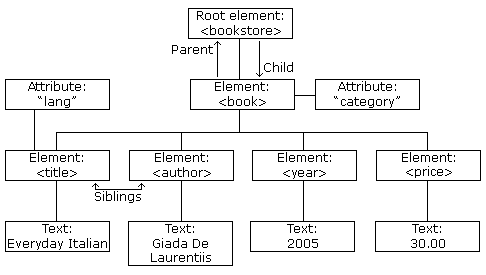

## Another XML example

```
<router>
  <hostname>R1</hostname>
  <interface>
     <name>Gigabit 0/0</name>
     <desc>Connect to R2 Chiangmai</desc>
     <cdp>enable</cdp>
  </interface>
  <interface>
     <name>Gigabit 0/1</name>
     <desc>Connect to R3 Khonkaen</desc>
     <cdp>disable</cdp>
  </interface>
  <interface>
     <name>Gigabit 0/2</name>
     <desc>Connect to R4 Phuket</desc>
     <cdp>enable</cdp>
  </interface>
</router>
```
https://countwordsfree.com/xmlviewer

## Parsing XML with xml.etree.ElementTree

In [ ]:
import xml.etree.ElementTree as ET
import re

myfile.xml

```
<?xml version="1.0" encoding="UTF-8"?>
<rpc message-id="1" id="100"
 xmlns="urn:ietf:params:xml:ns:netconf:base:1.0">
 <edit-config>
  <target>
   <candidate/>
  </target>
  <default-operation>merge</default-operation>
  <test-option>set</test-option>
  <config>
   <int8.1
    xmlns:nc="urn:ietf:params:xml:ns:netconf:base:1.0"
    nc:operation="create"
    xmlns="http://netconfcentral.org/ns/test">9</int8.1>
  </config>
 </edit-config>
</rpc>
```

In [ ]:
# Upload myfile.xml to content folder before executing this cell
f = open("myfile.xml")
data = f.read()
data

'<?xml version="1.0" encoding="UTF-8"?>\n<rpc message-id="1" id="100"\n xmlns="urn:ietf:params:xml:ns:netconf:base:1.0">\n <edit-config>\n  <target>\n   <candidate/>\n  </target>\n  <default-operation>merge</default-operation>\n  <test-option>set</test-option>\n  <config>\n   <int8.1\n    xmlns:nc="urn:ietf:params:xml:ns:netconf:base:1.0"\n    nc:operation="create"\n    xmlns="http://netconfcentral.org/ns/test">9</int8.1>\n  </config>\n </edit-config>\n</rpc>'

In [ ]:
xml = ET.parse("myfile.xml")
xml

In [ ]:
root = xml.getroot()
root

<Element '{urn:ietf:params:xml:ns:netconf:base:1.0}rpc' at 0x7f7c782bf590>

Now we can get root tag and root attributes

In [ ]:
root.tag

'{urn:ietf:params:xml:ns:netconf:base:1.0}rpc'

tag is xml name space (xmlns) + tagname.
In this example, root tag is {urn:ietf:params:xml:ns:netconf:base:1.0}rpc

In [ ]:
root.attrib

{'message-id': '1', 'id': '100'}

We want only xml namespace. 

In [ ]:
ns = re.match('{.*}', root.tag)
ns

<re.Match object; span=(0, 41), match='{urn:ietf:params:xml:ns:netconf:base:1.0}'>

In [ ]:
ns = ns.group()
ns

'{urn:ietf:params:xml:ns:netconf:base:1.0}'

In [ ]:
editconf = root.find("{}edit-config".format(ns))
editconf

<Element '{urn:ietf:params:xml:ns:netconf:base:1.0}edit-config' at 0x7f574c4b77c0>

In [ ]:
defop = editconf.find("{}default-operation".format(ns))
defop

<Element '{urn:ietf:params:xml:ns:netconf:base:1.0}default-operation' at 0x7f574c4b7a90>

In [ ]:
testop = editconf.find("{}test-option".format(ns))
testop

<Element '{urn:ietf:params:xml:ns:netconf:base:1.0}test-option' at 0x7f574c4b7ae0>

In [ ]:
print("The default-operation contains: {}".format(defop.text))
print("The test-option contains: {}".format(testop.text))

The default-operation contains: merge
The test-option contains: set


## Parsing XML with lmxl

In [ ]:
from lxml import etree as ET

In [ ]:
xml = ET.parse("myfile.xml")
xml

In [ ]:
root = xml.getroot()
root

<Element {urn:ietf:params:xml:ns:netconf:base:1.0}rpc at 0x7f574f4448c0>

In [ ]:
root.tag

'{urn:ietf:params:xml:ns:netconf:base:1.0}rpc'

In [ ]:
for element in root:
    print(element)

<Element {urn:ietf:params:xml:ns:netconf:base:1.0}edit-config at 0x7f574f4618c0>


In [ ]:
edit_config = root[0]
edit_config

<Element {urn:ietf:params:xml:ns:netconf:base:1.0}edit-config at 0x7f574f4618c0>

In [ ]:
for element in edit_config:
    print(element)

<Element {urn:ietf:params:xml:ns:netconf:base:1.0}target at 0x7f574f3ec780>
<Element {urn:ietf:params:xml:ns:netconf:base:1.0}default-operation at 0x7f574f3ec4c0>
<Element {urn:ietf:params:xml:ns:netconf:base:1.0}test-option at 0x7f574f3ec240>
<Element {urn:ietf:params:xml:ns:netconf:base:1.0}config at 0x7f574f3ec780>


In [ ]:
defop = edit_config[1]
defop

<Element {urn:ietf:params:xml:ns:netconf:base:1.0}default-operation at 0x7f574f3c7780>

In [ ]:
defop.text

'merge'

In [ ]:
testop = edit_config[2]
testop

<Element {urn:ietf:params:xml:ns:netconf:base:1.0}test-option at 0x7f574f3ee080>

In [ ]:
testop.text

## Parsing XML with xmltodict

In [ ]:
import xmltodict

In [ ]:
pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xmltodict

In [ ]:
xml_file = open("myfile.xml", "r")
xml_data = xml_file.read()
xml_data

'<?xml version="1.0" encoding="UTF-8"?>\n<rpc message-id="1"\n xmlns="urn:ietf:params:xml:ns:netconf:base:1.0">\n <edit-config>\n  <target>\n   <candidate/>\n  </target>\n  <default-operation>merge</default-operation>\n  <test-option>set</test-option>\n  <config>\n   <int8.1\n    xmlns:nc="urn:ietf:params:xml:ns:netconf:base:1.0"\n    nc:operation="create"\n    xmlns="http://netconfcentral.org/ns/test">9</int8.1>\n  </config>\n </edit-config>\n</rpc>'

In [ ]:
from pprint import pprint
pprint(data)

('<?xml version="1.0" encoding="UTF-8"?>\n'
 '<rpc message-id="1"\n'
 ' xmlns="urn:ietf:params:xml:ns:netconf:base:1.0">\n'
 ' <edit-config>\n'
 '  <target>\n'
 '   <candidate/>\n'
 '  </target>\n'
 '  <default-operation>merge</default-operation>\n'
 '  <test-option>set</test-option>\n'
 '  <config>\n'
 '   <int8.1\n'
 '    xmlns:nc="urn:ietf:params:xml:ns:netconf:base:1.0"\n'
 '    nc:operation="create"\n'
 '    xmlns="http://netconfcentral.org/ns/test">9</int8.1>\n'
 '  </config>\n'
 ' </edit-config>\n'
 '</rpc>')


In [ ]:
xml = xmltodict.parse(xml_data)
type(xml)

dict

In [ ]:
for element in xml:
    print(element)

In [ ]:
for element in xml['rpc']:
    print(element)

In [ ]:
xml['rpc']['@message-id']

In [ ]:
xml['rpc']['@xmlns']

In [ ]:
xml['rpc']['edit-config']

In [ ]:
for element in xml['rpc']['edit-config']:
    print(element)

In [ ]:
xml['rpc']['edit-config']['default-operation']

In [ ]:
xml['rpc']['edit-config']['test-option']

## Parsing XML With untangle

In [ ]:
myresponse = """<services>
  <service>
    <name>Service A</name>
    <status>Running</status>
  </service>
  <service>
    <name>Service B</name>
    <status>Idle</status>
  </service>
</services>"""

In [ ]:
!pip install untangle

  Created wheel for untangle: filename=untangle-1.1.1-py3-none-any.whl size=3412 sha256=c410a5b170623b33faebdd31bccab5423b013e01801a45702ea531f669392bc0
  Stored in directory: /root/.cache/pip/wheels/b9/a9/9c/45580c8b7a00e3e79b889e8e78a4f3427fff5a4d48f1cfea0a
Successfully built untangle


In [ ]:
import untangle

In [ ]:
myreponse_python = untangle.parse(myresponse)

In [ ]:
myreponse_python.services.service[1].name.cdata, myreponse_python.services.service[1].status.cdata

('Service B', 'Idle')

#JSON

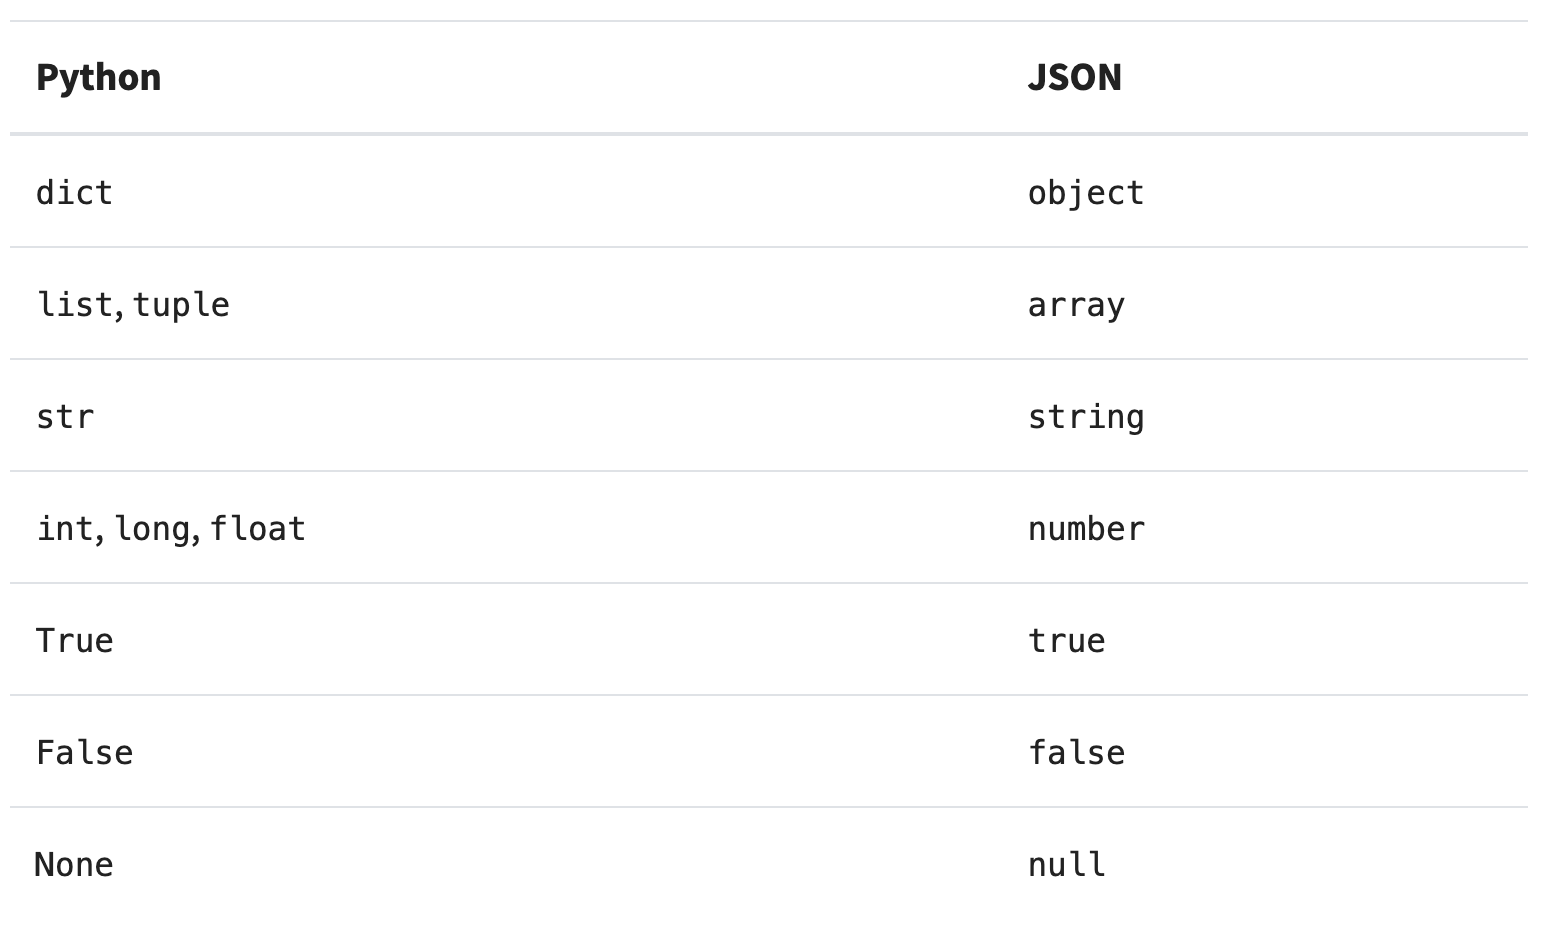

In [ ]:
import json

##Example

```
{
    "router": {
        "hostname": "R1",
        "interface": [
            {
                "name": "Gigabit 0/0",
                "desc": "Connect to R2 Chiangmai",
                "cdp": "enable"
            },
            {
                "name": "Gigabit 0/1",
                "desc": "Connect to R3 Khonkaen",
                "cdp": "disable"
            },
            {
                "name": "Gigabit 0/2",
                "desc": "Connect to R4 Phuket",
                "cdp": "enable"
            }
        ]
    }
}
```

##json.loads() - Load from string

In [ ]:
json_data_str = """{
    "router": {
        "hostname": "R1",
        "interface": [
            {
                "name": "Gigabit 0/0",
                "desc": "Connect to R2 Chiangmai",
                "cdp": "enable"
            },
            {
                "name": "Gigabit 0/1",
                "desc": "Connect to R3 Khonkaen",
                "cdp": "disable"
            },
            {
                "name": "Gigabit 0/2",
                "desc": "Connect to R4 Phuket",
                "cdp": "enable"
            }
        ]
    }
}"""
type(json_data_str)

In [ ]:
data = json.loads(json_data_str)
data

In [ ]:
pprint(data)

In [ ]:
type(data)

In [ ]:
data['router']['interface'][2]['desc']

##json.load() - Load from file

myfile.json

```
{
 "access_token":"ZDI3MGEyYzQtNmFlNS00NDNhLWFlNzAtZGVjNjE0MGU1OGZmZWNmZDEwN2ItYTU3",
 "expires_in":1209600,
 "refresh_token":"MDEyMzQ1Njc4OTAxMjM0NTY3ODkwMTIzNDU2Nzg5MDEyMzQ1Njc4OTEyMzQ1Njc4",
 "refreshtokenexpires_in":7776000
}
```


In [ ]:
import json

In [ ]:
#Upload myfile.json to content folder before executing this cell
#Use context manager
with open('myfile.json') as f:
    data = json.load(f)

In [ ]:
data

In [ ]:
type(data)

In [ ]:
data['access_token']

#YAML


https://zetcode.com/python/yaml/



In [ ]:
import yaml

In [ ]:
!pip install pyyaml

##Examples

netplan network configuration
```
network:
  version: 2
  renderer: networkd
  ethernets:
    mainif:
      match:
        macaddress: "de:ad:be:ef:ca:fe"
      set-name: mainif
      addresses: [ "10.3.0.5/23" ]
      gateway4: 10.3.0.1
      nameservers:
        addresses: [ "8.8.8.8", "8.8.4.4" ]
        search: [ example.com ]
```


```
router:
  hostname: R1
  interface:
    - name: Gigabit 0/0
      desc: Connect to R2 Chiangmai
      cdp: enable
    - name: Gigabit 0/1
      desc: Connect to R3 Khonkaen
      cdp: disable
    - name: Gigabit 0/2
      desc: Connect to R4 Phuket
      cdp: enable
```
https://codebeautify.org/json-to-yaml


##yaml.safe_load()

In [ ]:
yaml_str = """
router:
  hostname: R1
  interface:
    - name: Gigabit 0/0
      desc: Connect to R2 Chiangmai
      cdp: enable
    - name: Gigabit 0/1
      desc: Connect to R3 Khonkaen
      cdp: disable
    - name: Gigabit 0/2
      desc: Connect to R4 Phuket
      cdp: enable
"""
yaml_document = yaml.safe_load(yaml_str)
yaml_document

In [ ]:
yaml_document['router']['hostname']

Yaml multiple documents
```
---
router:
  hostname: R1
  interface:
    - name: Gigabit 0/0
      desc: Connect to R2 Chiangmai
      cdp: enable
    - name: Gigabit 0/1
      desc: Connect to R3 Khonkaen
      cdp: disable
    - name: Gigabit 0/2
      desc: Connect to R4 Phuket
      cdp: enable
...
---
switch:
  hostname: S1
  os: IOSvL2
...
```

In [ ]:
yaml_str = """
---
router:
  hostname: R1
  interface:
    - name: Gigabit 0/0
      desc: Connect to R2 Chiangmai
      cdp: enable
    - name: Gigabit 0/1
      desc: Connect to R3 Khonkaen
      cdp: disable
    - name: Gigabit 0/2
      desc: Connect to R4 Phuket
      cdp: enable
...
---
switch:
  hostname: S1
  os: IOSvL2
...
"""
yaml_document = yaml.safe_load(yaml_str)

##yaml.safe_load_all()

In [ ]:
yaml_str = """
---
router:
  hostname: R1
  interface:
    - name: Gigabit 0/0
      desc: Connect to R2 Chiangmai
      cdp: enable
    - name: Gigabit 0/1
      desc: Connect to R3 Khonkaen
      cdp: disable
    - name: Gigabit 0/2
      desc: Connect to R4 Phuket
      cdp: enable
...
---
switch:
  hostname: S1
  os: IOSvL2
...
"""
yaml_documents = yaml.safe_load_all(yaml_str)
yaml_documents

In [ ]:
document1 = next(yaml_documents)
document1

In [ ]:
document1['router']['interface'][2]['cdp']

In [ ]:
document2 = next(yaml_documents)
document2

In [ ]:
document2['switch']['hostname']

In [ ]:
document3 = next(yaml_documents)

In [ ]:
for document in yaml_documents:
    print(document)

myfile.yaml

```
---
access_token: ZDI3MGEyYzQtNmFlNS00NDNhLWFlNzAtZGVjNjE0MGU1OGZmZWNmZDEwN2ItYTU3
expires_in: 1209600
refresh_token: MDEyMzQ1Njc4OTAxMjM0NTY3ODkwMTIzNDU2Nzg5MDEyMzQ1Njc4OTEyMzQ1Njc4
refreshtokenexpires_in: 7776000
```

In [ ]:
#Upload myfile.yaml to content folder before executing this cell
#Use context manager
with open('myfile.yaml') as f:
    #yaml_data = yaml.load(f, Loader=yaml.SafeLoader)
    yaml_data = yaml.safe_load(f)
yaml_data

In [ ]:
yaml_data['access_token']

# Parsing vs. Serialization

Parsing is, generally speaking, the processing of an input stream into meaningful data structures; in the XML context, parsing is the process of reading a sequence of characters conforming to the grammar and other constraints of the XML spec into whatever internal representation of XML your program uses.

Serialization is the opposite process: processing the internal data structures of a program (in this context, your internal representation of an XML document) and creating a character sequence (typically written to an output stream) that conforms to the angle-bracket syntax of the spec.

Use a parser to read XML from a character stream into data structures; use a serializer to write data structures out into a character stream.

https://stackoverflow.com/questions/11965419/xml-serialization-vs-xml-parsing



##Serialization to XML

### xmltodict

In [ ]:
xml_str = '''<?xml version="1.0" encoding="UTF-8"?>
<rpc message-id="1"
 xmlns="urn:ietf:params:xml:ns:netconf:base:1.0">
 <edit-config>
  <target>
   <candidate/>
  </target>
  <default-operation>merge</default-operation>
  <test-option>set</test-option>
  <config>
   <int8.1
    xmlns:nc="urn:ietf:params:xml:ns:netconf:base:1.0"
    nc:operation="create"
    xmlns="http://netconfcentral.org/ns/test">9</int8.1>
  </config>
 </edit-config>
</rpc>'''

In [ ]:
xml_dict = xmltodict.parse(xml_str)
type(xml_dict)

dict

In [ ]:
xml_dict

{'rpc': {'@message-id': '1',
  '@xmlns': 'urn:ietf:params:xml:ns:netconf:base:1.0',
  'edit-config': {'target': {'candidate': None},
   'default-operation': 'merge',
   'test-option': 'set',
   'config': {'int8.1': {'@xmlns:nc': 'urn:ietf:params:xml:ns:netconf:base:1.0',
     '@nc:operation': 'create',
     '@xmlns': 'http://netconfcentral.org/ns/test',
     '#text': '9'}}}}}

In [ ]:
xml_data = xmltodict.unparse(xml_dict)
xml_data

'<?xml version="1.0" encoding="utf-8"?>\n<rpc message-id="1" xmlns="urn:ietf:params:xml:ns:netconf:base:1.0"><edit-config><target><candidate></candidate></target><default-operation>merge</default-operation><test-option>set</test-option><config><int8.1 xmlns:nc="urn:ietf:params:xml:ns:netconf:base:1.0" nc:operation="create" xmlns="http://netconfcentral.org/ns/test">9</int8.1></config></edit-config></rpc>'

In [ ]:
type(xml_data)

str

In [ ]:
xml_dict = xmltodict.parse(xml_data)
xml_dict

{'rpc': {'@message-id': '1',
  '@xmlns': 'urn:ietf:params:xml:ns:netconf:base:1.0',
  'edit-config': {'target': {'candidate': None},
   'default-operation': 'merge',
   'test-option': 'set',
   'config': {'int8.1': {'@xmlns:nc': 'urn:ietf:params:xml:ns:netconf:base:1.0',
     '@nc:operation': 'create',
     '@xmlns': 'http://netconfcentral.org/ns/test',
     '#text': '9'}}}}}

##Serialization to JSON

###json.dumps() - dump to string

In [ ]:
data = {"access_token": 'ZDI3MGEyYzQtNmFlNS00NDNhLWFlNzAtZGVjNjE0MGU1OGZmZWNmZDEwN2ItYTU3',
 'expires_in': 1209600,
 'refresh_token': 'MDEyMzQ1Njc4OTAxMjM0NTY3ODkwMTIzNDU2Nzg5MDEyMzQ1Njc4OTEyMzQ1Njc4',
 'refreshtokenexpires_in': 7776000}
type(data)

In [ ]:
import json
json_data_str = json.dumps(data)
type(json_data_str)

In [ ]:
json_data_str

In [ ]:
data_str = str(data)
data_str

In [ ]:
json_data_str == data_str

In [ ]:
import json
x = {"a": 1, 'b': 2}
print(type(x))
str_x = str(x)
json_str_x = json.dumps(x)
print("str_x: ", str_x)
print("json_str_x: ", json_str_x)

In [ ]:
json_x = json.loads(str_x)
json_x

In [ ]:
json_x = json.loads(json_str_x)
json_x

In [ ]:
x = [True, False]
str_x = str(x)
print(str_x)
json_x = json.loads(str_x)

In [ ]:
x = [True, False]
str_x = json.dumps(x)
print(str_x)
json_x = json.loads(str_x)
print(json_x)

###json.dump() - dump to file

In [ ]:
with open('datafile.json', 'w') as f:
    json.dump(data, f)

In [ ]:
with open('datafile.json', 'r') as f:
    print(f.read())

In [ ]:
with open('datafile.json', 'w') as f:
    json.dump(data, f, sort_keys=True, indent=2)

In [ ]:
with open('datafile.json', 'r') as f:
    print(f.read())

##Serialization to YAML

###yaml.dump() - dump to string and file

In [ ]:
data = {'access_token': 'ZDI3MGEyYzQtNmFlNS00NDNhLWFlNzAtZGVjNjE0MGU1OGZmZWNmZDEwN2ItYTU3', 'expires_in': 1209600, 'refresh_token': 'MDEyMzQ1Njc4OTAxMjM0NTY3ODkwMTIzNDU2Nzg5MDEyMzQ1Njc4OTEyMzQ1Njc4', 'refreshtokenexpires_in': 7776000}
type(data)

In [ ]:
yaml_data_str = yaml.dump(data)
type(yaml_data_str)

In [ ]:
yaml_data_str

In [ ]:
data_str = str(data)
data_str

In [ ]:
yaml_data_str == data_str

In [ ]:
data1 = yaml.safe_load(yaml_data_str)
data1

In [ ]:
data2 = yaml.safe_load(data_str)
data2

In [ ]:
with open('datafile.yaml', 'w') as f:
    yaml.dump(data, f)

In [ ]:
with open('datafile.yaml', 'r') as f:
    print(f.read())

In [ ]:
with open('datafile.yaml', 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

In [ ]:
with open('datafile.yaml', 'r') as f:
    print(f.read())